# Billboard EDA V- By Debut Year

This is where I'll try to calculate weeks per song per year, and potentially look at some other "lifespan" related questions

In [1]:
# Packages & Settings


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm

%matplotlib inline

In [2]:
# importing Billboard CSV
billboard_df = pd.read_csv('data/Hot_Stuff.csv')

In [3]:
# converting WeekID to datetime
billboard_df['WeekID'] = pd.to_datetime(billboard_df['WeekID'])

In [4]:
# renaming columns to python standards

billboard_df = billboard_df.rename(columns={"url": "url", "WeekID": "week_id", "Week Position": 'week_position', "Song": 'song', "Performer": "performer", "SongID": "song_id", "Instance": "instance", "Previous Week Position": "prev_week_position", "Peak Position": "peak_position", "Weeks on Chart": "weeks_on_chart"})

In [5]:
#creating date/month/day/year columns


billboard_df['date']= billboard_df['week_id'].dt.date
billboard_df['month'] = billboard_df['week_id'].dt.month
billboard_df['day']= billboard_df['week_id'].dt.day
billboard_df['year'] = billboard_df['week_id'].dt.year

In [6]:
# dropping 'URL' column- I don't think I'll reference it for now
# Note: I might be using the URL column if I end up doing some webscraping
billboard_df = billboard_df.drop(columns=['url'])

In [7]:
# replacing artist names: pre string-split

billboard_df["performer"]= billboard_df["performer"].replace("Elvis Presley With The Jordanaires", "Elvis Presley") 
billboard_df["performer"]= billboard_df["performer"].replace("James Brown And The Famous Flames", "James Brown") 
billboard_df["performer"]= billboard_df["performer"].replace("Prince and the Revolution", "Prince") 

In [8]:
# String Split
new = billboard_df["performer"].str.split(" Featuring ", n = 1, expand = True) 
billboard_df["main_performer"]= new[0] 
billboard_df["featured_performer"]= new[1] 

In [9]:
# Post-String Split replacements of artist names
billboard_df["main_performer"]= billboard_df["main_performer"].replace("Janet Jackson", "Janet")
billboard_df["main_performer"]= billboard_df["main_performer"].replace("Jay Z", "Jay-Z")
billboard_df["featured_performer"]= billboard_df["featured_performer"].replace("Janet Jackson", "Janet")
billboard_df["featured_performer"]= billboard_df["featured_performer"].replace("Jay Z", "Jay-Z")
# Frankie Valli and the 4 Seasons
billboard_df["main_performer"]= billboard_df["main_performer"].replace("Frankie Valli", "The 4 Seasons")

In [10]:
# Creating "chart-points" variable (formerly known as "week-points") 
# note: I'm going to keep these as floats: I don't think I need them as floats for anything,
# but if this is all eventually going into one notebook, then I don't see the harm
billboard_df['chart_points'] = billboard_df.apply(lambda row: 101- row.week_position, axis=1).astype(float)
billboard_df['weeks_on_chart'] = billboard_df['weeks_on_chart'].astype(float)

# Note: This is the end of cleaning billboard_df

# Presentation slide: value counts of debut years, and total artists in a year 

In [11]:
# creating "unique_df" for number of unique artists/songs per year

unique_df = billboard_df.groupby('year').nunique()

In [12]:
unique_df.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer,chart_points
year,,,,,,,,,,,,,,,,
1958,22,100,338,220,352,2,100,100,22,22,5,18,1,220,0,100
1959,52,100,641,351,663,3,100,100,26,52,12,31,1,351,0,100
1960,53,100,668,334,700,3,100,100,27,53,12,31,1,331,5,100
1961,52,100,747,399,779,4,100,100,26,52,12,30,1,398,3,100
1962,52,100,748,382,768,5,100,100,40,52,12,31,1,381,2,100


In [13]:
unique_df = unique_df.drop("year", axis=1).reset_index()

In [14]:
unique_df = unique_df.drop(columns=['week_id', 'week_position', 'instance', 'prev_week_position', 'peak_position', 'weeks_on_chart', 'date', 'month', 'day', 'chart_points'])

In [15]:
unique_df.head()

,year,song,performer,song_id,main_performer,featured_performer
0,1958,338,220,352,220,0
1,1959,641,351,663,351,0
2,1960,668,334,700,331,5
3,1961,747,399,779,398,3
4,1962,748,382,768,381,2


In [16]:
main_performer_min_year_groupby = billboard_df.groupby(['main_performer']).year.min().reset_index()

In [17]:
main_performer_min_year_groupby.head(200)

,main_performer,year
0,"""Groove"" Holmes",1966
1,"""Little"" Jimmy Dickens",1965
2,"""Pookie"" Hudson",1963
3,"""Weird Al"" Yankovic",1983
4,'N Sync,1998
5,'N Sync & Gloria Estefan,1999
6,'Til Tuesday,1985
7,(+44),2006
8,(The Preacher) Bobby Womack,1972
9,0,1978


In [18]:
debut_value_counts_df = main_performer_min_year_groupby.year.value_counts().to_frame().reset_index()
debut_value_counts_df.head()

,index,year
0,1961,230
1,1959,221
2,1958,220
3,1970,194
4,1962,187


In [19]:
debut_value_counts_df = debut_value_counts_df.sort_values(by=['index'], ascending=True)

In [20]:
debut_value_counts_df = debut_value_counts_df.rename(columns={"index" : "debut_year", "year": "main_performer_debut"})
debut_value_counts_df.head()

,debut_year,main_performer_debut
2,1958,220
1,1959,221
8,1960,176
0,1961,230
4,1962,187


In [ ]:
debut_value_counts.head()

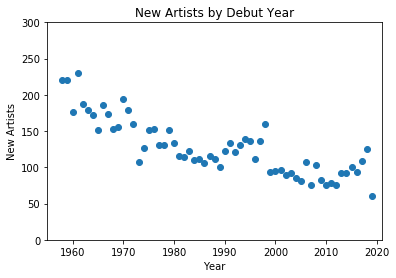

In [21]:
#plt.figure(figsize=(10, 6))
plt.scatter('debut_year', 'main_performer_debut', data = debut_value_counts_df)
#plt.hlines(y=25, xmin = 0, xmax = 250, color = 'orange')
#plt.hlines(y=30, xmin = 0, xmax = 250, color = 'red')
plt.xlim(1955, 2021)
plt.ylim(0, 300)
#plt.annotate(s = 'overweight', xy = (0, 25))
#plt.annotate(s = 'obese', xy = (0, 30))

plt.xlabel('Year')

plt.ylabel('New Artists')

plt.title('New Artists by Debut Year');

plt.show()

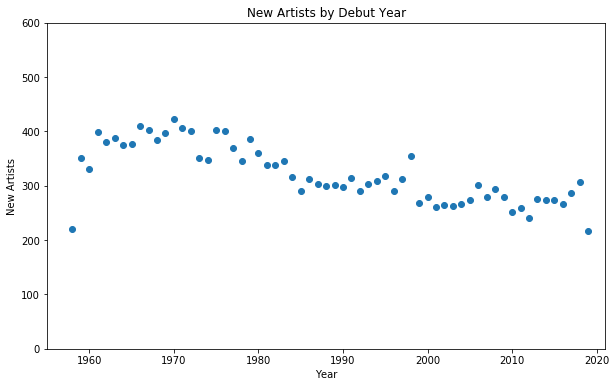

In [109]:
plt.figure(figsize=(10, 6))
plt.scatter('year', 'main_performer', data = unique_df)
#plt.hlines(y=25, xmin = 0, xmax = 250, color = 'orange')
#plt.hlines(y=30, xmin = 0, xmax = 250, color = 'red')
plt.xlim(1955, 2021)
plt.ylim(0, 600)
#plt.annotate(s = 'overweight', xy = (0, 25))
#plt.annotate(s = 'obese', xy = (0, 30))

plt.xlabel('Year')

plt.ylabel('New Artists')

plt.title('New Artists by Debut Year');

plt.show()

In [23]:
debut_value_counts_df.head()

,debut_year,main_performer_debut
2,1958,220
1,1959,221
8,1960,176
0,1961,230
4,1962,187


In [24]:
unique_df.head()

,year,song,performer,song_id,main_performer,featured_performer
0,1958,338,220,352,220,0
1,1959,641,351,663,351,0
2,1960,668,334,700,331,5
3,1961,747,399,779,398,3
4,1962,748,382,768,381,2


In [25]:
chart_one_df = debut_value_counts_df.set_index('debut_year').join(unique_df.set_index('year'))

In [26]:
chart_one_df.head()

,main_performer_debut,song,performer,song_id,main_performer,featured_performer
debut_year,,,,,,
1958,220,338,220,352,220,0
1959,221,641,351,663,351,0
1960,176,668,334,700,331,5
1961,230,747,399,779,398,3
1962,187,748,382,768,381,2


In [27]:
chart_one_df.song_id.describe()

count     62.000000
mean     553.903226
std      131.695963
min      349.000000
25%      458.250000
50%      520.000000
75%      640.750000
max      832.000000
Name: song_id, dtype: float64

In [28]:
chart_one_df = chart_one_df.reset_index()

# Ok here's my concept for presentations:

1) Slide introducing number of songs per year (plt scatter)
2) Slide intro

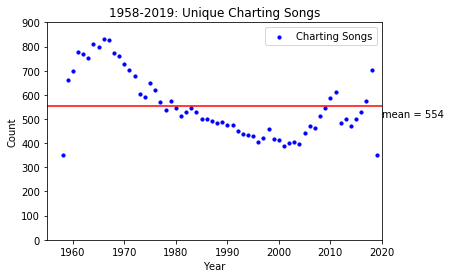

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(chart_one_df.debut_year, chart_one_df.song_id, s=10, c='b', marker="o", label='Charting Songs')
#ax1.scatter(chart_one_df.debut_year, chart_one_df.main_performer_debut, s=10, c='g', marker="o", label='First-Time Performers')
#ax1.scatter(chart_one_df.debut_year, chart_one_df.song_id, s=10, c='y', marker="o", label='Songs')
plt.xlim(1955, 2020)
plt.ylim(0, 900)
plt.hlines(y=553, xmin = 1955, xmax = 2020, color = 'red')
#plt.hlines(y=128, xmin = 1955, xmax = 2020, color = 'purple')
plt.annotate(s = 'mean = 554', xy = (2020, 509))
#plt.annotate(s = 'mean = 128', xy = (1956, 100))
plt.xlabel('Year')

plt.ylabel('Count')

plt.title('1958-2019: Unique Charting Songs')
plt.legend(loc='upper right');

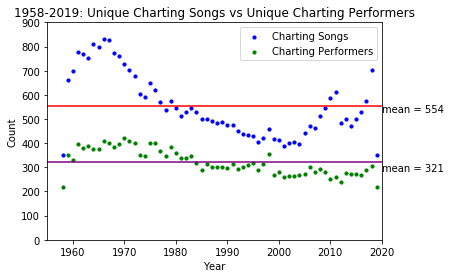

In [30]:

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(chart_one_df.debut_year, chart_one_df.song_id, s=10, c='b', marker="o", label='Charting Songs')
ax1.scatter(chart_one_df.debut_year, chart_one_df.main_performer, s=10, c='g', marker="o", label='Charting Performers')
#ax1.scatter(chart_one_df.debut_year, chart_one_df.song_id, s=10, c='y', marker="o", label='Songs')
plt.xlim(1955, 2020)
plt.ylim(0, 900)
plt.hlines(y=553, xmin = 1955, xmax = 2020, color = 'red')
plt.hlines(y=321, xmin = 1955, xmax = 2020, color = 'purple')
plt.annotate(s = 'mean = 321', xy = (2020, 285))
plt.annotate(s = 'mean = 554', xy = (2020, 530))
plt.xlabel('Year')

plt.ylabel('Count')

plt.title('1958-2019: Unique Charting Songs vs Unique Charting Performers')
plt.legend(loc='upper right');

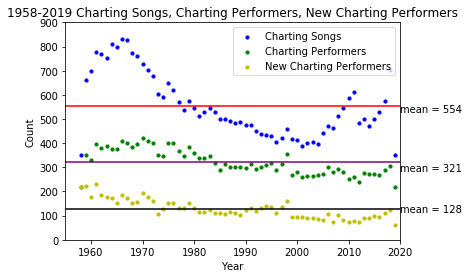

In [31]:

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(chart_one_df.debut_year, chart_one_df.song_id, s=10, c='b', marker="o", label='Charting Songs')
ax1.scatter(chart_one_df.debut_year, chart_one_df.main_performer, s=10, c='g', marker="o", label='Charting Performers')
ax1.scatter(chart_one_df.debut_year, chart_one_df.main_performer_debut, s=10, c='y', marker="o", label='New Charting Performers')
plt.xlim(1955, 2020)
plt.ylim(0, 900)
plt.hlines(y=553, xmin = 1955, xmax = 2020, color = 'red')
plt.hlines(y=321, xmin = 1955, xmax = 2020, color = 'purple')
plt.hlines(y=128, xmin = 1955, xmax = 2020, color = 'black')
plt.annotate(s = 'mean = 321', xy = (2020, 285))
plt.annotate(s = 'mean = 554', xy = (2020, 530))
plt.annotate(s = 'mean = 128', xy = (2020, 115))
plt.xlabel('Year')

plt.ylabel('Count')

plt.title('1958-2019 Charting Songs, Charting Performers, New Charting Performers')
plt.legend(loc='upper right');

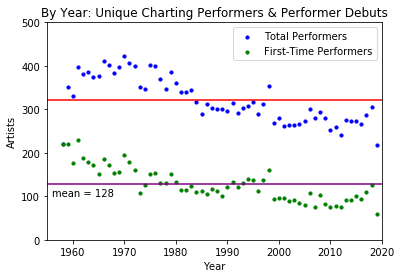

In [32]:

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(chart_one_df.debut_year, chart_one_df.main_performer, s=10, c='b', marker="o", label='Total Performers')
ax1.scatter(chart_one_df.debut_year, chart_one_df.main_performer_debut, s=10, c='g', marker="o", label='First-Time Performers')
#ax1.scatter(chart_one_df.debut_year, chart_one_df.song_id, s=10, c='y', marker="o", label='Songs')
plt.xlim(1955, 2020)
plt.ylim(0, 500)
plt.hlines(y=322, xmin = 1955, xmax = 2020, color = 'red')
plt.hlines(y=128, xmin = 1955, xmax = 2020, color = 'purple')
#plt.annotate(s = 'mean = 321', xy = (1956, 300))
plt.annotate(s = 'mean = 128', xy = (1956, 100))
plt.xlabel('Year')

plt.ylabel('Artists')

plt.title('By Year: Unique Charting Performers & Performer Debuts')
plt.legend(loc='upper right');

In [33]:
chart_one_df.main_performer.describe()

count     62.000000
mean     321.209677
std       52.953471
min      217.000000
25%      279.000000
50%      310.000000
75%      367.000000
max      422.000000
Name: main_performer, dtype: float64

In [34]:
chart_one_df.main_performer_debut.describe()

count     62.000000
mean     127.806452
std       39.156198
min       60.000000
25%       97.000000
50%      121.500000
75%      152.750000
max      230.000000
Name: main_performer_debut, dtype: float64

In [36]:
chart_one_df['pct_new_performers'] = chart_one_df.apply(lambda row: row.main_performer_debut/row.main_performer, axis=1)

In [37]:
chart_one_df.head()

,debut_year,main_performer_debut,song,performer,song_id,main_performer,featured_performer,pct_new_performers
0,1958,220,338,220,352,220,0,1.000000
1,1959,221,641,351,663,351,0,0.629630
2,1960,176,668,334,700,331,5,0.531722
3,1961,230,747,399,779,398,3,0.577889
4,1962,187,748,382,768,381,2,0.490814


In [113]:
chart_one_df.pct_new_performers.describe()

count    62.000000
mean      0.394982
std       0.103268
min       0.268817
25%       0.339933
50%       0.378361
75%       0.428653
max       1.000000
Name: pct_new_performers, dtype: float64

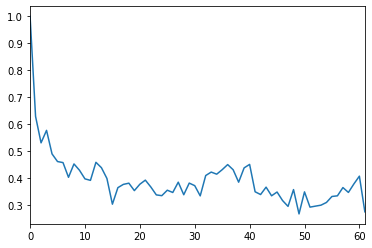

In [110]:
chart_one_df.pct_new_performers.plot()

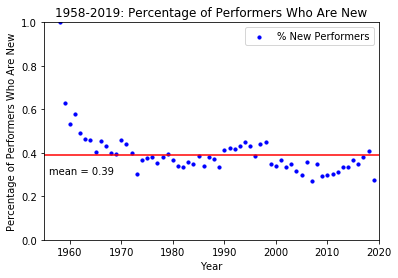

In [118]:

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(chart_one_df.debut_year, chart_one_df.pct_new_performers, s=10, c='b', marker="o", label='% New Performers')

#ax1.scatter(chart_one_df.debut_year, chart_one_df.song_id, s=10, c='y', marker="o", label='Songs')
plt.xlim(1955, 2020)
plt.ylim(0, 1)
plt.hlines(y=.39, xmin = 1955, xmax = 2020, color = 'red')
#plt.hlines(y=128, xmin = 1955, xmax = 2020, color = 'purple')
#plt.annotate(s = 'mean = 321', xy = (1956, 300))
plt.annotate(s = 'mean = 0.39', xy = (1956, .30))
plt.xlabel('Year')

plt.ylabel('Percentage of Performers Who Are New')

plt.title('1958-2019: Percentage of Performers Who Are New')
plt.legend(loc='upper right');

In [38]:
chart_one_df.pct_new_performers.describe()

count    62.000000
mean      0.394982
std       0.103268
min       0.268817
25%       0.339933
50%       0.378361
75%       0.428653
max       1.000000
Name: pct_new_performers, dtype: float64

In [39]:
chart_one_df.song_id.describe()

count     62.000000
mean     553.903226
std      131.695963
min      349.000000
25%      458.250000
50%      520.000000
75%      640.750000
max      832.000000
Name: song_id, dtype: float64

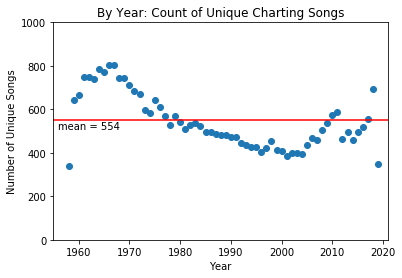

In [40]:
#plt.figure(figsize=(10, 6))
plt.scatter('debut_year', 'song', data = chart_one_df)
#plt.hlines(y=25, xmin = 0, xmax = 250, color = 'orange')
#plt.hlines(y=30, xmin = 0, xmax = 250, color = 'red')
plt.xlim(1955, 2021)
plt.ylim(0, 1000)
#plt.annotate(s = 'overweight', xy = (0, 25))
#plt.annotate(s = 'obese', xy = (0, 30))
plt.hlines(y=553, xmin = 1955, xmax = 2025, color = 'red')

plt.annotate(s = 'mean = 554', xy = (1956, 509))
plt.xlabel('Year')
plt.ylabel('Number of Unique Songs')

plt.title('By Year: Count of Unique Charting Songs');

plt.show()

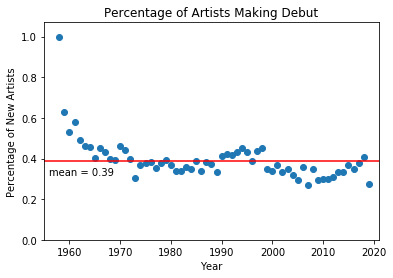

In [41]:
#plt.figure(figsize=(10, 6))
plt.scatter('debut_year', 'pct_new_performers', data = chart_one_df)
#plt.hlines(y=25, xmin = 0, xmax = 250, color = 'orange')
#plt.hlines(y=30, xmin = 0, xmax = 250, color = 'red')
plt.xlim(1955, 2021)
plt.ylim(0, 1.07)
#plt.annotate(s = 'overweight', xy = (0, 25))
#plt.annotate(s = 'obese', xy = (0, 30))
plt.hlines(y=0.39, xmin = 1955, xmax = 2025, color = 'red')
plt.xlabel('Year')
plt.annotate(s = 'mean = 0.39', xy = (1956, 0.32))

plt.ylabel('Percentage of New Artists')

plt.title('Percentage of Artists Making Debut');

plt.show()

In [42]:
chart_one_df.corr()

,debut_year,main_performer_debut,song,performer,song_id,main_performer,featured_performer,pct_new_performers
debut_year,1.000000,-0.838839,-0.630860,-0.291001,-0.630531,-0.762741,0.862213,-0.570244
main_performer_debut,-0.838839,1.000000,0.619197,0.430274,0.624438,0.720208,-0.624642,0.792142
song,-0.630860,0.619197,1.000000,0.830712,0.999116,0.804237,-0.322612,0.159802
performer,-0.291001,0.430274,0.830712,1.000000,0.822110,0.753912,-0.011770,-0.059136
song_id,-0.630531,0.624438,0.999116,0.822110,1.000000,0.790120,-0.313133,0.176474
main_performer,-0.762741,0.720208,0.804237,0.753912,0.790120,1.000000,-0.639273,0.173673
featured_performer,0.862213,-0.624642,-0.322612,-0.011770,-0.313133,-0.639273,1.000000,-0.386057
pct_new_performers,-0.570244,0.792142,0.159802,-0.059136,0.176474,0.173673,-0.386057,1.000000


In [43]:
main_performer_unique_years_groupby = billboard_df.groupby(['main_performer']).year.nunique().reset_index()

In [44]:
main_performer_unique_years_groupby = main_performer_unique_years_groupby.rename(columns={"year": "unique_years"})
main_performer_unique_years_groupby.head(200)


,main_performer,unique_years
0,"""Groove"" Holmes",1
1,"""Little"" Jimmy Dickens",1
2,"""Pookie"" Hudson",1
3,"""Weird Al"" Yankovic",9
4,'N Sync,5
5,'N Sync & Gloria Estefan,2
6,'Til Tuesday,4
7,(+44),1
8,(The Preacher) Bobby Womack,1
9,0,1


In [45]:

new_df = main_performer_min_year_groupby.set_index('main_performer').join(main_performer_unique_years_groupby.set_index('main_performer'))

In [46]:
new_df.head(10)

,year,unique_years
main_performer,,
"""Groove"" Holmes",1966,1
"""Little"" Jimmy Dickens",1965,1
"""Pookie"" Hudson",1963,1
"""Weird Al"" Yankovic",1983,9
'N Sync,1998,5
'N Sync & Gloria Estefan,1999,2
'Til Tuesday,1985,4
(+44),2006,1
(The Preacher) Bobby Womack,1972,1


In [47]:
new_df = new_df.sort_values(by='unique_years', ascending=False)

In [48]:
new_df.head()

,year,unique_years
main_performer,,
Elton John,1970,30
Rod Stewart,1971,28
Mariah Carey,1990,28
Madonna,1983,27
The Rolling Stones,1964,27


In [49]:


X = new_df["year"] ## X usually means our input variables (or independent variables)
y = new_df["unique_years"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

C:\Users\dingw\Anaconda3_new\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           unique_years   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     20.11
Date:                Tue, 07 Jan 2020   Prob (F-statistic):           7.40e-06
Time:                        18:02:49   Log-Likelihood:                -19474.
No. Observations:                7924   AIC:                         3.895e+04
Df Residuals:                    7922   BIC:                         3.897e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.2776      3.515      5.200      0.000      11.387      25.168
year          -0.0079      0.002     -4.485      0.000      -0.011      -0.004
==============================================================================
Omnibus:                     5865.647   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           102026.083
Skew:                           3.469   Prob(JB):                         0.00
Kurtosis:                      19.152   Cond. No.                     2.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

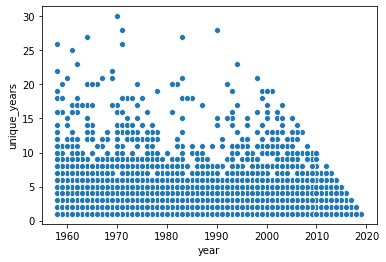

In [50]:
ax = sns.scatterplot(x="year", y = "unique_years", data=new_df)

In [51]:
new_df.head()

,year,unique_years
main_performer,,
Elton John,1970,30
Rod Stewart,1971,28
Mariah Carey,1990,28
Madonna,1983,27
The Rolling Stones,1964,27


In [52]:
new_df['decade'] = new_df.year//10*10

In [53]:
new_df['decade_str'] = new_df.decade.astype(str) + 's'

In [54]:
new_df.head()

,year,unique_years,decade,decade_str
main_performer,,,,
Elton John,1970,30,1970,1970s
Rod Stewart,1971,28,1970,1970s
Mariah Carey,1990,28,1990,1990s
Madonna,1983,27,1980,1980s
The Rolling Stones,1964,27,1960,1960s


In [55]:
new_df = new_df.sort_values(by=['decade_str'], ascending=True)

In [56]:
new_df.head()

,year,unique_years,decade,decade_str
main_performer,,,,
Quaker City Boys,1958,2,1950,1950s
The Falcons,1959,1,1950,1950s
Eddy Arnold,1959,6,1950,1950s
Sonny Spencer,1959,1,1950,1950s
Ralph DeMarco,1959,1,1950,1950s


In [57]:
new_df['decade_str'] = new_df['decade_str'].str.replace('1950s','1960s')

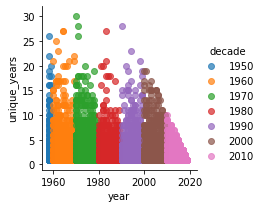

In [58]:
#time for new facetgrid

g = sns.FacetGrid(new_df, hue="decade")
g.map(plt.scatter, "year",  "unique_years", alpha=.7)
g.add_legend();

Text(0, 0.5, 'Performer Career Length')

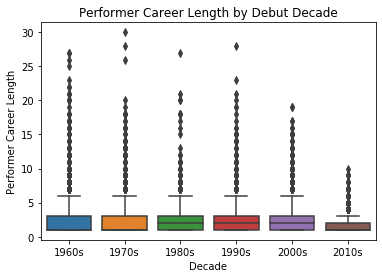

In [59]:
eda_boxplot = sns.boxplot(y="unique_years", x = "decade_str", data=new_df)
plt.title('Performer Career Length by Debut Decade')
plt.xlabel('Decade')
plt.ylabel('Performer Career Length')


Text(0, 0.5, 'Performer Career Length')

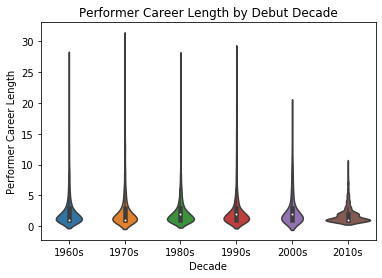

In [60]:
sns.violinplot(y="unique_years", x = "decade_str", data=new_df)
plt.title('Performer Career Length by Debut Decade')
plt.xlabel('Decade')
plt.ylabel('Performer Career Length')

## note: I like this violin plot, so I'm going to make an unlabelled one

([], <a list of 0 Text yticklabel objects>)

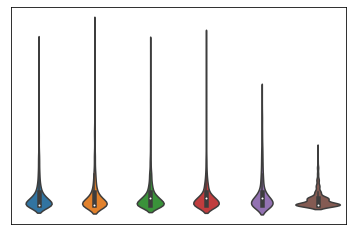

In [61]:
sns.violinplot(y="unique_years", x = "decade_str", data=new_df)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.xticks(range(0), ''.split())
plt.yticks(range(0), ''.split())

In [62]:
new_df.nlargest(5, ['unique_years']) 

,year,unique_years,decade,decade_str
main_performer,,,,
Elton John,1970,30,1970,1970s
Rod Stewart,1971,28,1970,1970s
Mariah Carey,1990,28,1990,1990s
Stevie Wonder,1964,27,1960,1960s
The Rolling Stones,1964,27,1960,1960s


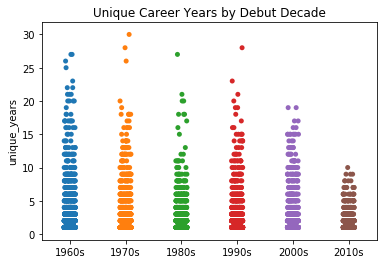

In [119]:
sns.stripplot(y="unique_years", x = "decade_str", data=new_df)
plt.title('Unique Career Years by Debut Decade')
plt.xlabel('');

In [64]:
new_groupby = new_df.groupby(['year']).unique_years.mean().reset_index()

In [65]:
new_groupby.head(200)

,year,unique_years
0,1958,3.831818
1,1959,2.266968
2,1960,2.477273
3,1961,2.486957
4,1962,2.844920
5,1963,2.279330
6,1964,2.802326
7,1965,2.815789
8,1966,2.102151
9,1967,2.254335


In [66]:
yearly_median_groupby =  new_df.groupby(['year']).unique_years.median().reset_index()

In [67]:
yearly_median_groupby.tail(30)

,year,unique_years
32,1990,1.0
33,1991,1.0
34,1992,2.0
35,1993,2.0
36,1994,2.0
37,1995,2.0
38,1996,2.0
39,1997,2.0
40,1998,1.0
41,1999,2.0


(0, 3)

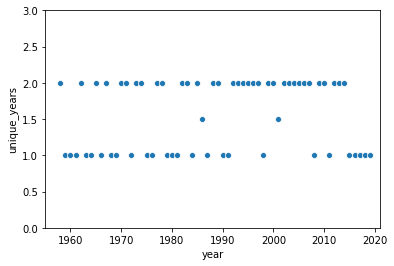

In [125]:
ax = sns.scatterplot(x="year", y = "unique_years", data=yearly_median_groupby)
plt.xlim(1955, 2021)
plt.ylim(0, 3)

(0, 5)

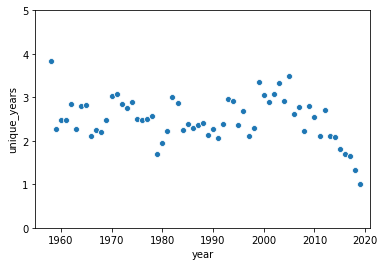

In [126]:
# This is the chart I'm remaking

ax = sns.scatterplot(x="year", y = "unique_years", data=new_groupby)
plt.xlim(1955, 2021)
plt.ylim(0, 5)


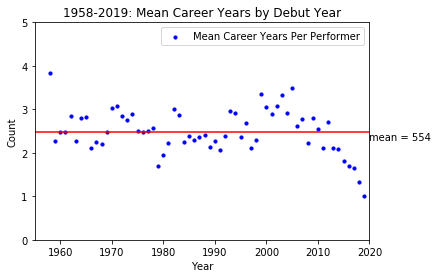

In [121]:

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x="year", y = "unique_years", data=new_groupby, s=10, c='b', marker="o", label='Mean Career Years Per Performer')
#ax1.scatter(chart_one_df.debut_year, chart_one_df.main_performer_debut, s=10, c='g', marker="o", label='First-Time Performers')
#ax1.scatter(chart_one_df.debut_year, chart_one_df.song_id, s=10, c='y', marker="o", label='Songs')
plt.xlim(1955, 2020)
plt.ylim(0, 5)
plt.hlines(y=2.49, xmin = 1955, xmax = 2020, color = 'red')
#plt.hlines(y=128, xmin = 1955, xmax = 2020, color = 'purple')
plt.annotate(s = 'mean = 554', xy = (2020, 2.3))
#plt.annotate(s = 'mean = 128', xy = (1956, 100))
plt.xlabel('Year')

plt.ylabel('Count')

plt.title('1958-2019: Mean Career Years by Debut Year')
plt.legend(loc='upper right');

In [71]:
new_groupby.unique_years.describe()

count    62.000000
mean      2.494795
std       0.506189
min       1.000000
25%       2.218869
50%       2.477198
75%       2.848730
max       3.831818
Name: unique_years, dtype: float64

In [72]:
new_groupby.head()

,year,unique_years
0,1958,3.831818
1,1959,2.266968
2,1960,2.477273
3,1961,2.486957
4,1962,2.844920


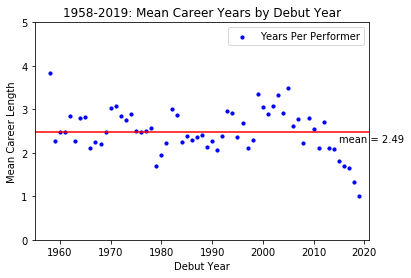

In [123]:
#plt.figure(figsize=(10, 6))
plt.scatter('year', 'unique_years', data = new_groupby,s=10, c='b', marker="o", label='Years Per Performer')
#plt.hlines(y=25, xmin = 0, xmax = 250, color = 'orange')
#plt.hlines(y=30, xmin = 0, xmax = 250, color = 'red')
plt.xlim(1955, 2021)
plt.ylim(0, 5)
#plt.annotate(s = 'overweight', xy = (0, 25))
#plt.annotate(s = 'obese', xy = (0, 30))
plt.hlines(y=2.49, xmin = 1955, xmax = 2025, color = 'red')

plt.annotate(s = 'mean = 2.49', xy = (2015, 2.25))
plt.xlabel('Debut Year')
plt.ylabel('Mean Career Length')

plt.title('1958-2019: Mean Career Years by Debut Year')
plt.legend(loc='upper right');


In [74]:
new_groupby.head()

,year,unique_years
0,1958,3.831818
1,1959,2.266968
2,1960,2.477273
3,1961,2.486957
4,1962,2.844920


In [75]:


X = new_groupby["year"] ## X usually means our input variables (or independent variables)
y = new_groupby["unique_years"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

C:\Users\dingw\Anaconda3_new\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           unique_years   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     4.907
Date:                Tue, 07 Jan 2020   Prob (F-statistic):             0.0306
Time:                        18:02:53   Log-Likelihood:                -42.821
No. Observations:                  62   AIC:                             89.64
Df Residuals:                      60   BIC:                             93.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.8342      6.925      2.575      0.012       3.982      31.687
year          -0.0077      0.003     -2.215      0.031      -0.015      -0.001
==============================================================================
Omnibus:                        0.455   Durbin-Watson:                   0.844
Prob(Omnibus):                  0.797   Jarque-Bera (JB):                0.231
Skew:                           0.149   Prob(JB):                        0.891
Kurtosis:                       3.021   Cond. No.                     2.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:


X = yearly_median_groupby["year"] ## X usually means our input variables (or independent variables)
y = yearly_median_groupby["unique_years"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           unique_years   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9921
Date:                Tue, 07 Jan 2020   Prob (F-statistic):              0.323
Time:                        18:02:53   Log-Likelihood:                -42.936
No. Observations:                  62   AIC:                             89.87
Df Residuals:                      60   BIC:                             94.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3457      6.938     -0.770      0.444     -19.224       8.533
year           0.0035      0.003      0.996      0.323      -0.004       0.010
==============================================================================
Omnibus:                     1412.033   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.331
Skew:                          -0.262   Prob(JB):                      0.00941
Kurtosis:                       1.173   Cond. No.                     2.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Ok, we would expect recent years to have lower values. I'm gonna do this again with Week ID

In [77]:
main_performer_unique_week_id_groupby = billboard_df.groupby(['main_performer']).week_id.nunique().reset_index()

In [78]:
billboard_df.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer,chart_points
0,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1.0,1990-02-10,2,10,1990,Jane Child,None,26.0
1,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2.0,1990-02-17,2,17,1990,Jane Child,None,48.0
2,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3.0,1990-02-24,2,24,1990,Jane Child,None,58.0
3,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4.0,1990-03-03,3,3,1990,Jane Child,None,64.0
4,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5.0,1990-03-10,3,10,1990,Jane Child,None,74.0


In [79]:
also_a_new_df = main_performer_min_year_groupby.set_index('main_performer').join(main_performer_unique_week_id_groupby.set_index('main_performer'))

In [80]:
also_a_new_df.head()

,year,week_id
main_performer,,
"""Groove"" Holmes",1966,14
"""Little"" Jimmy Dickens",1965,10
"""Pookie"" Hudson",1963,1
"""Weird Al"" Yankovic",1983,84
'N Sync,1998,172


In [81]:
also_a_new_groupby = also_a_new_df.groupby(['year']).week_id.mean().reset_index()

In [82]:
median_groupby = also_a_new_df.groupby(['year']).week_id.median().reset_index()

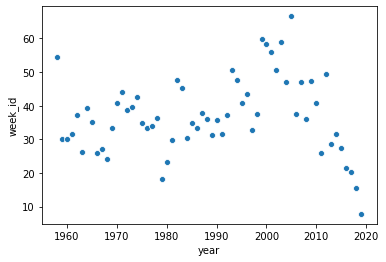

In [83]:
ax = sns.scatterplot(x="year", y = "week_id", data=also_a_new_groupby)

In [84]:
also_a_new_groupby.week_id.describe()

count    62.000000
mean     37.072001
std      11.357958
min       7.850000
25%      30.263636
50%      36.140950
75%      43.963849
max      66.592593
Name: week_id, dtype: float64

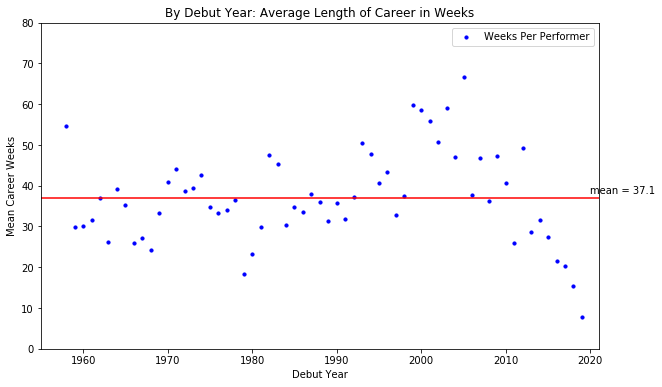

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter('year', 'week_id', data = also_a_new_groupby, s=10, c='b', marker="o", label='Weeks Per Performer' )

plt.xlim(1955, 2021)
plt.ylim(0, 80)

plt.hlines(y=37, xmin = 1955, xmax = 2025, color = 'red')

plt.annotate(s = 'mean = 37.1', xy = (2020,38))
plt.xlabel('Debut Year')
plt.ylabel('Mean Career Weeks')

plt.title('By Debut Year: Average Length of Career in Weeks')
plt.legend(loc='upper right');



# Note: I want to recreate the boxplots for this distribution

In [86]:
also_a_new_df.head()

,year,week_id
main_performer,,
"""Groove"" Holmes",1966,14
"""Little"" Jimmy Dickens",1965,10
"""Pookie"" Hudson",1963,1
"""Weird Al"" Yankovic",1983,84
'N Sync,1998,172


# Creating "decade" on also_a_new_df

In [87]:
also_a_new_df['decade'] = also_a_new_df.year//10*10

In [88]:
also_a_new_df['decade_str'] = also_a_new_df.decade.astype(str) + 's'

In [89]:
also_a_new_df['decade_str'] = also_a_new_df['decade_str'].str.replace('1950s','1960s')

In [90]:
also_a_new_df = also_a_new_df.sort_values(by=['decade_str'], ascending=True)

Text(0, 0.5, 'Performer Career Length in Weeks')

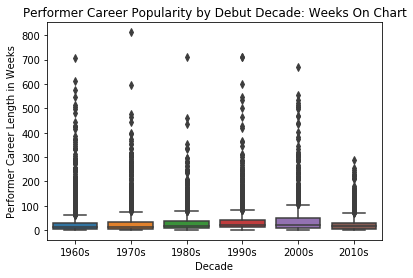

In [91]:
eda_boxplot = sns.boxplot(y="week_id", x = "decade_str", data=also_a_new_df)
plt.title('Performer Career Popularity by Debut Decade: Weeks On Chart')
plt.xlabel('Decade')
plt.ylabel('Performer Career Length in Weeks')

In [92]:
# creating "unique_df" for number of unique artists/songs per year

songs_per_performer_df = billboard_df.groupby('main_performer').nunique()

In [93]:
songs_per_performer_df.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer,chart_points
main_performer,,,,,,,,,,,,,,,,
"""Groove"" Holmes",14,13,2,1,2,1,11,11,11,14,5,14,1,1,0,13
"""Little"" Jimmy Dickens",10,10,1,1,1,1,9,8,10,10,3,10,1,1,0,10
"""Pookie"" Hudson",1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1
"""Weird Al"" Yankovic",84,59,11,1,11,1,55,29,20,84,11,31,9,1,0,59
'N Sync,172,68,10,2,10,1,64,43,26,172,12,30,5,1,1,68


# Note: I'm not using the median or mean stuff now. Maybe I will at some point, but I think boxplots do the trick.

(0, 30)

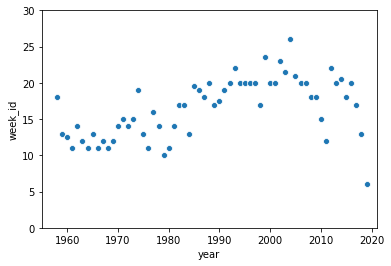

In [127]:
ax = sns.scatterplot(x="year", y = "week_id", data=median_groupby)

plt.xlim(1955, 2021)
plt.ylim(0, 30)


In [95]:


X = also_a_new_groupby["year"] ## X usually means our input variables (or independent variables)
y = also_a_new_groupby["week_id"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

C:\Users\dingw\Anaconda3_new\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                week_id   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.1476
Date:                Tue, 07 Jan 2020   Prob (F-statistic):              0.702
Time:                        18:03:00   Log-Likelihood:                -238.05
No. Observations:                  62   AIC:                             480.1
Df Residuals:                      60   BIC:                             484.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.9408    161.421     -0.155      0.878    -347.830     297.948
year           0.0312      0.081      0.384      0.702      -0.131       0.194
==============================================================================
Omnibus:                        0.937   Durbin-Watson:                   0.821
Prob(Omnibus):                  0.626   Jarque-Bera (JB):                0.391
Skew:                           0.135   Prob(JB):                        0.823
Kurtosis:                       3.279   Cond. No.                     2.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:


X = median_groupby["year"] ## X usually means our input variables (or independent variables)
y = median_groupby["week_id"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                week_id   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     20.92
Date:                Tue, 07 Jan 2020   Prob (F-statistic):           2.46e-05
Time:                        18:03:00   Log-Likelihood:                -165.57
No. Observations:                  62   AIC:                             335.1
Df Residuals:                      60   BIC:                             339.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -212.7757     50.148     -4.243      0.000    -313.087    -112.464
year           0.1153      0.025      4.573      0.000       0.065       0.166
==============================================================================
Omnibus:                       18.832   Durbin-Watson:                   0.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.793
Skew:                          -1.024   Prob(JB):                     1.25e-07
Kurtosis:                       5.848   Cond. No.                     2.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
also_a_new_groupby.head(200)

,year,week_id
0,1958,54.581818
1,1959,29.968326
2,1960,30.227273
3,1961,31.543478
4,1962,37.106952
5,1963,26.156425
6,1964,39.279070
7,1965,35.276316
8,1966,25.833333
9,1967,27.104046


(0, 100)

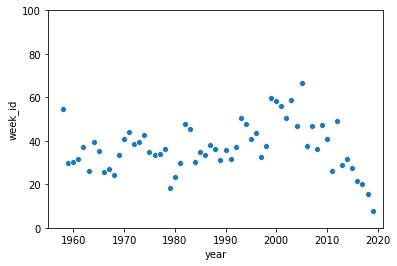

In [128]:
ax = sns.scatterplot(x="year", y = "week_id", data=also_a_new_groupby)
plt.xlim(1955, 2021)
plt.ylim(0, 100)

In [99]:
# one more round with maximums 
max_yearly_groupby = new_df.groupby(['year']).unique_years.max().reset_index()

(0, 35)

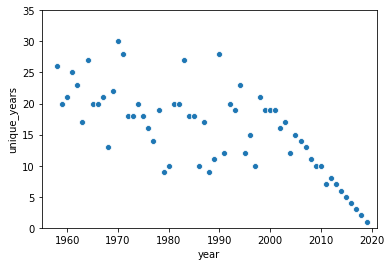

In [129]:
ax = sns.scatterplot(x="year", y = "unique_years", data=max_yearly_groupby)
plt.xlim(1955, 2021)
plt.ylim(0, 35)

In [101]:
max_weekly_groupby = also_a_new_df.groupby(['year']).week_id.max().reset_index()

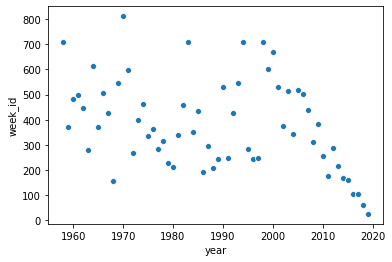

In [102]:
ax = sns.scatterplot(x="year", y = "week_id", data=max_weekly_groupby)

In [103]:


X = max_yearly_groupby["year"] ## X usually means our input variables (or independent variables)
y = new_groupby["unique_years"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           unique_years   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     4.907
Date:                Tue, 07 Jan 2020   Prob (F-statistic):             0.0306
Time:                        18:03:01   Log-Likelihood:                -42.821
No. Observations:                  62   AIC:                             89.64
Df Residuals:                      60   BIC:                             93.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.8342      6.925      2.575      0.012       3.982      31.687
year          -0.0077      0.003     -2.215      0.031      -0.015      -0.001
==============================================================================
Omnibus:                        0.455   Durbin-Watson:                   0.844
Prob(Omnibus):                  0.797   Jarque-Bera (JB):                0.231
Skew:                           0.149   Prob(JB):                        0.891
Kurtosis:                       3.021   Cond. No.                     2.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:


X = max_weekly_groupby["year"] ## X usually means our input variables (or independent variables)
y = max_weekly_groupby["week_id"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                week_id   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     10.15
Date:                Tue, 07 Jan 2020   Prob (F-statistic):            0.00229
Time:                        18:03:01   Log-Likelihood:                -404.17
No. Observations:                  62   AIC:                             812.3
Df Residuals:                      60   BIC:                             816.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7877.3600   2352.782      3.348      0.001    3171.096    1.26e+04
year          -3.7699      1.183     -3.186      0.002      -6.137      -1.403
==============================================================================
Omnibus:                        4.201   Durbin-Watson:                   1.206
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                4.034
Skew:                           0.573   Prob(JB):                        0.133
Kurtosis:                       2.501   Cond. No.                     2.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
also_a_new_groupby.week_id.describe()

count    62.000000
mean     37.072001
std      11.357958
min       7.850000
25%      30.263636
50%      36.140950
75%      43.963849
max      66.592593
Name: week_id, dtype: float64

In [106]:
new_groupby.unique_years.describe()

count    62.000000
mean      2.494795
std       0.506189
min       1.000000
25%       2.218869
50%       2.477198
75%       2.848730
max       3.831818
Name: unique_years, dtype: float64

In [107]:


X = new_groupby["year"] ## X usually means our input variables (or independent variables)
y = new_groupby["unique_years"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           unique_years   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     4.907
Date:                Tue, 07 Jan 2020   Prob (F-statistic):             0.0306
Time:                        18:03:01   Log-Likelihood:                -42.821
No. Observations:                  62   AIC:                             89.64
Df Residuals:                      60   BIC:                             93.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.8342      6.925      2.575      0.012       3.982      31.687
year          -0.0077      0.003     -2.215      0.031      -0.015      -0.001
==============================================================================
Omnibus:                        0.455   Durbin-Watson:                   0.844
Prob(Omnibus):                  0.797   Jarque-Bera (JB):                0.231
Skew:                           0.149   Prob(JB):                        0.891
Kurtosis:                       3.021   Cond. No.                     2.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:


X = also_a_new_groupby["year"] ## X usually means our input variables (or independent variables)
y = also_a_new_groupby["week_id"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                week_id   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.1476
Date:                Tue, 07 Jan 2020   Prob (F-statistic):              0.702
Time:                        18:03:01   Log-Likelihood:                -238.05
No. Observations:                  62   AIC:                             480.1
Df Residuals:                      60   BIC:                             484.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.9408    161.421     -0.155      0.878    -347.830     297.948
year           0.0312      0.081      0.384      0.702      -0.131       0.194
==============================================================================
Omnibus:                        0.937   Durbin-Watson:                   0.821
Prob(Omnibus):                  0.626   Jarque-Bera (JB):                0.391
Skew:                           0.135   Prob(JB):                        0.823
Kurtosis:                       3.279   Cond. No.                     2.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# This is the end of this notebook.